In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [9]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates = ["date"], index_col = "date")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [11]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [12]:
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

In [13]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


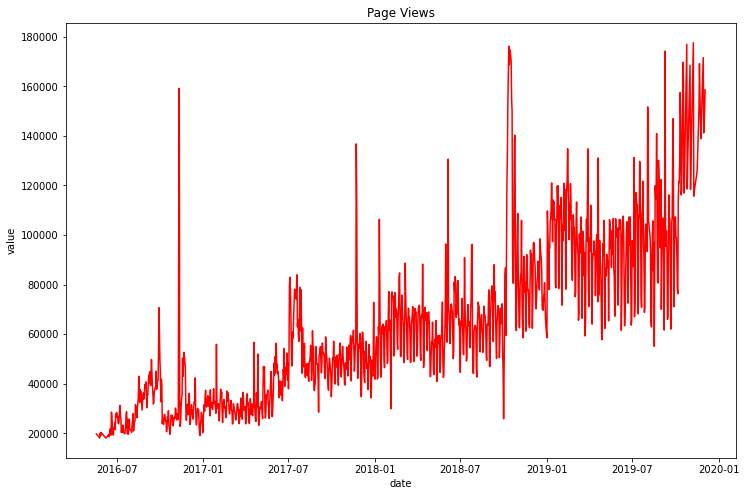

In [24]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(df.index, df["value"], "r")
ax.set_title("Page Views")
ax.set_xlabel("date")
ax.set_ylabel("value")
plt.show()

In [25]:
df["years"] = df.index.year

In [26]:
df["months"] = df.index.month

In [27]:
df

,value,years,months
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [30]:
bar = df.groupby(["years","months"])["value"].mean()

In [32]:
bar = bar.unstack()

In [33]:
bar

months,1,2,3,4,5,6,7,8,9,10,11,12
years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


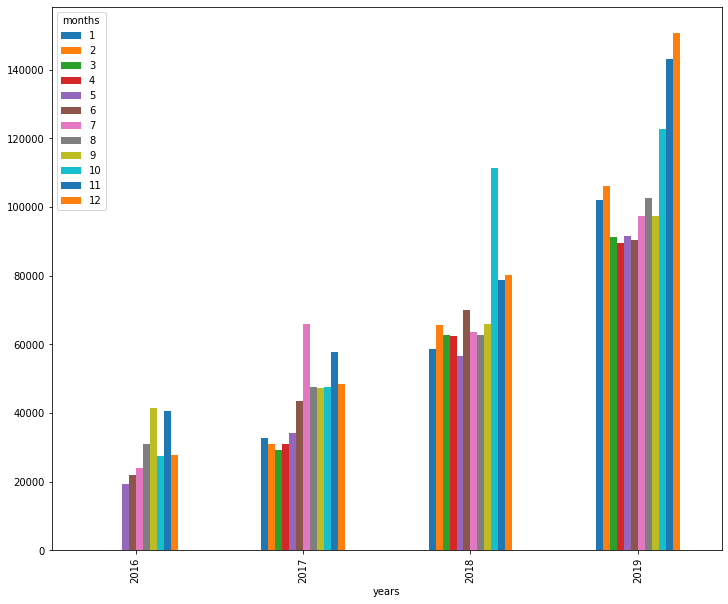

In [40]:
fig = bar.plot.bar(legend =True, figsize = (12,10))

In [42]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

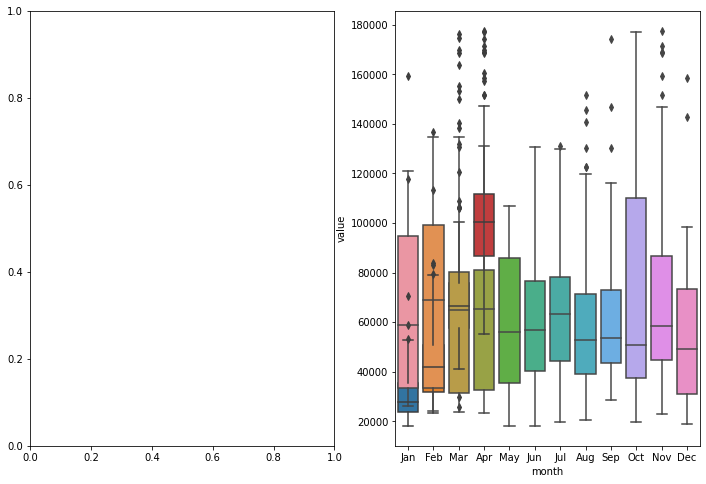

In [47]:
# df_box["no_month"]= df_box["date"].dt.month
# df_box = df_box.sort_values("no_month")
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

ax[0] =sns.boxplot(x = df_box["year"], y = df_box["value"])

ax[1] = sns.boxplot(x = df_box["month"],y= df_box["value"])
